<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Hanz Karim Peña Hernandez y Bernardo Ramírez

**Fecha:** 14 de Marzo del 2023.

**Expediente** : 727232.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea 5: Clase 10

### Código de solución estudiante 1

In [1]:
# Librería de optimización 
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
%matplotlib inline

# <font color ='red'> **Tarea 5**  
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.
2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).
3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 
4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. 

El máximo de f es: [1.875]


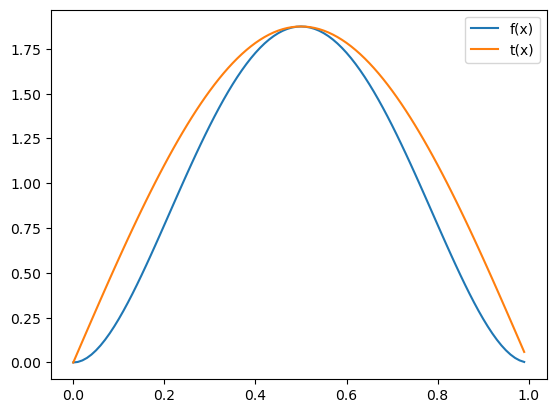

In [2]:
f = lambda x: 30*(x**2 - 2*x**3 + x**4)
a = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
x = np.arange(0,1,0.01)
t = lambda x : a*np.sin(np.pi*x)
print('El máximo de f es:', a)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

## Encontrar función de densidad g(x)
$$g(x)=\frac{t(x)}{C}$$

$$C=\int_{0}^{1}t(x)dx$$

$$C= \int a\sin(\pi x) dx= \frac{-a}{\pi}\cos(\pi x)$$

$$=\int_{0}^{1}a\sin(\pi x)dx= [\frac{-a}{\pi}\cos(\pi)] - [\frac{-a}{\pi} \cos(0)]$$

$$ [\frac{-a}{\pi}\cos(-1)] - [\frac{-a}{\pi} \cos(1)]$$

$$C=\frac{2a}{\pi}$$

$$g(x)=\frac{a\sin(\pi x)}{\frac{2a}{\pi}}$$

$$g(x)=\frac{\sin(\pi x)}{\frac{2}{\pi}}$$

### El método de la transformada inversa es una técnica para generar variables aleatorias a partir de una función de distribución acumulada (FDA) conocida. Si tenemos una función de densidad de probabilidad (FDP) g(x), podemos obtener su correspondiente FDA F(x) integrando la FDP desde menos infinito hasta x:

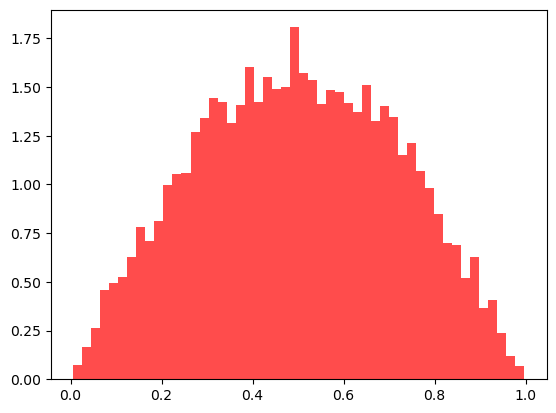

In [3]:
gx = np.sin(np.pi*x)/(2/np.pi) #FDP funcion de densidad
Fx = 1/2*(-np.cos(np.pi*x)+1) #FDA
inv_Fx = (1/np.pi)*np.arccos(1 - 2*x) #Inversa de FDA

# Define the inverse function of the CDF
def inv_cdf(y):
    return (1/np.pi)*np.arccos(1 - 2*y)

# Generate uniform random variables
u = np.random.uniform(size=10000)

# Apply the inverse function to obtain the desired random variables
x = inv_cdf(u)

# Plot a histogram to visualize the distribution
plt.hist(x, bins=50, density=True, alpha=0.7, color='red')
plt.show()

5. Genere 500 puntos aleatorios usando el método de aceptación y rechazo y las funciones $f(x)$ y $t(x)$ para validar que todos los cálculos anteriores están correctamente realizados.

In [4]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distribuidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayor a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()

El máximo de f es: [1.875]


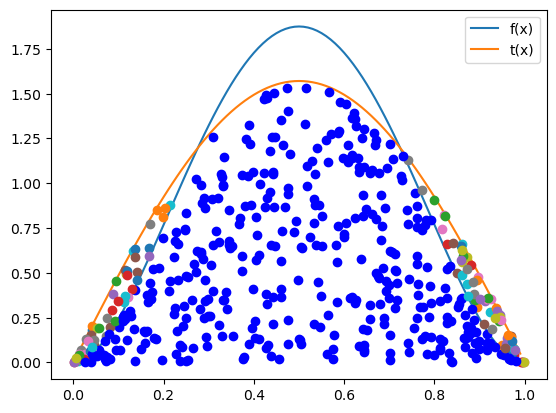

In [5]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x: 30*(x**2 - 2*x**3 + x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: np.sin(np.pi*x)/(2/np.pi)

# Rango donde se graficará las funciones
x = np.arange(0,1,0.01)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

### Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

# Prueba de función creada
Acep_rechazo(R2,R1,f,t)

6. Comparar el porcentaje de puntos de aceptación cuando se usa $t(x)$ constante y $t(x)$ un pulso senoidal. Concluir

In [6]:
def Acep_rechazo(R2: 'Variables distribuidas en g(x)',
         R1: 'Variables distribuidas U~U(0,1)',
         f: 'Función objetivo',
         t: 'Función que maximiza f',
         N: 'Número de simulaciones'):
    fx= f(R1)
    tx= t(R1)
    cond= tx*R2 <= fx
    return print(f'Tu porcentaje de aceptación es de: {sum(cond)/N}')
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)
#funcion sin senos
t1 = lambda x: (max_f * np.ones(len(x)))

#Función t(x) senoidal
Acep_rechazo(R2,R1,f,t,10000)
#Función t(x) sin seno 
Acep_rechazo(R2,R1,f,t1,10000)


Tu porcentaje de aceptación es de: 0.7784
Tu porcentaje de aceptación es de: 0.5317


7. Genere una variable aleatoria $X$ a partir de la siguiente PDF
$$f(x)=20x(1-x)^3$$ 
usando el método de aceptación y rechazo

Tu porcentaje de aceptación es de: 0.0253


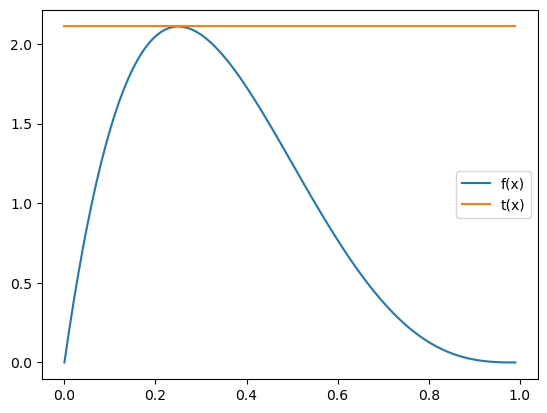

In [7]:
# Función objetivo 
f = lambda x: 20*x * (1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones(len(x))

x = np.arange(0, 1, 0.01)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc='best')
# Simulaciones
N = 500
R1 = np.random.rand(N)
R2 = np.random.rand(N)
# Prueba de función creada
Acep_rechazo(R2, R1, f, t,10000)

### Código de solución estudiante 2

In [8]:
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib notebook
%matplotlib inline

El máximo de f es: [1.875]


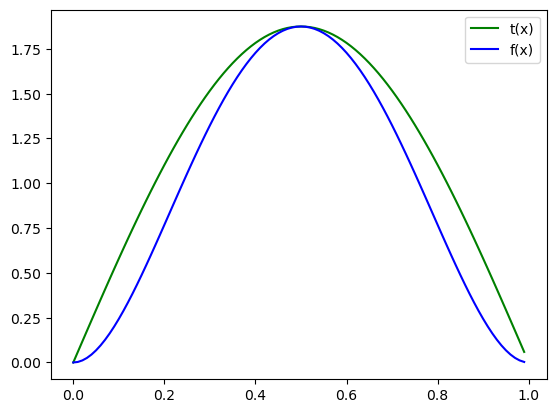

In [9]:
def acre1(R1: 'Variables distribuidas en g(x)',
         R2: 'Variables distribuidas U~U(0,1)',
         f: 'Función objetivo',
         t: 'Función que maximiza f'):
    f = f(R1)
    t= t(R1)
    cond= R2*t <= f 
    x = [R1[i] for i in range(len(R1)) if cond[i]]
    
def acre2(R2:'Variables distruidas U~U(0,1)',
         R1:'Variables distribuidas como g(x)',
         f:'función objetivo a generar',
         t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = f(R1)
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
                
    return x
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x: ((30 *(x**2 - 2*x**3 + x**4)))
# funcion inversa
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: (max_f * np.ones(len(x)))*np.sin(np.pi * x)

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
print('El máximo de f es:',max_f)


N = 10000 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

x2 = np.arange(0,1,0.01)


plt.plot(x2,t(x2),'g', label= 't(x)')
plt.plot(x2,f(x2),'b',label='f(x)')
plt.legend()


plt.show()



### Ejercicio 2 y 3
 
## Encontrar función de densidad g(x)
$$g(x)=\frac{t(x)}{C}$$

$$C=\int_{0}^{1}t(x)dx$$

$$C= \int a\sin(\pi x) dx= \frac{-a}{\pi}\cos(\pi x)$$

$$=\int_{0}^{1}a\sin(\pi x)dx= [\frac{-a}{\pi}\cos(\pi)] - [\frac{-a}{\pi} \cos(0)]$$

$$ [\frac{-a}{\pi}\cos(-1)] - [\frac{-a}{\pi} \cos(1)]$$

$$C=\frac{2a}{\pi}$$

$$g(x)=\frac{a\sin(\pi x)}{\frac{2a}{\pi}}$$

$$g(x)=\frac{\sin(\pi x)}{\frac{2}{\pi}}$$
 

### Ejercicio 4


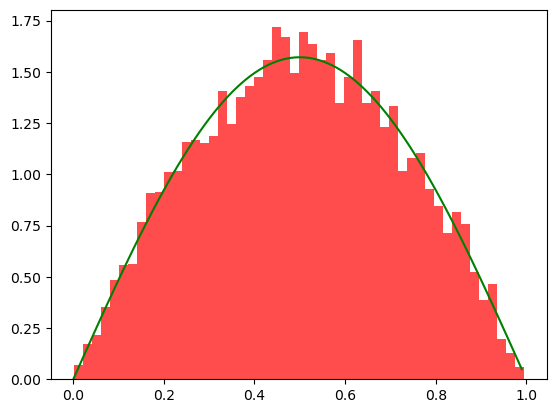

In [10]:
gx = lambda x: np.sin(np.pi*x)/(2/np.pi) #FDP funcion de densidad
Fx = 1/2*(-np.cos(np.pi*x)+1) #FDA
inv_Fx = (1/np.pi)*np.arccos(1 - 2*x) #Inversa de FDA

# Define the inverse function of the CDF
def inv_cdf(y):
    return (1/np.pi)*np.arccos(1 - 2*y)

# Generate uniform random variables
u = np.random.uniform(size=10000)

# Apply the inverse function to obtain the desired random variables
x = inv_cdf(u)

# Plot a histogram to visualize the distribution
plt.hist(x, bins=50, density=True, alpha=0.7, color='red')
plt.plot(x2,gx(x2),'g', label= 't(x)')
plt.plot()
plt.show()

### Ejercicio 5

El máximo de f es: [1.875]


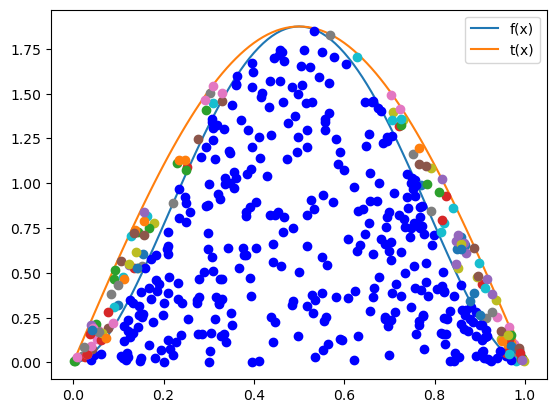

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [11]:
# Ilustración del método de aceptación y rechazo cuando se toma t(x) constante

# Función objetivo 
f = lambda x: 30 *(x**2 - 2*x**3 + x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: (max_f * np.ones(len(x)))*np.sin(np.pi * x)

# Rango donde se graficará las funciones
x = np.arange(0, 1, 0.01)
print('El máximo de f es:',max_f)

# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()

# Validación del método
N = 500 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

# Prueba de función creada
acre2(R2,R1,f,t)


### Ejercicio 6


In [12]:
def acre6(R2: 'Variables distribuidas en g(x)',
         R1: 'Variables distribuidas U~U(0,1)',
         f: 'Función objetivo',
         t: 'Función que maximiza f',
         N: 'Número de simulaciones'):
    fx= f(R1)
    tx= t(R1)
    cond= tx*R2 <= fx
    return print(f'Tu porcentaje de aceptación es de: {sum(cond)/N}')
N = 10000 # número de puntos a simular
R2 = np.random.rand(N)
R1 = np.random.rand(N)
#funcion sin senos
t1 = lambda x: (max_f * np.ones(len(x)))

#Función t(x) senoidal
acre6(R2,R1,f,t,10000)
#Función t(x) sin seno 
acre6(R2,R1,f,t1,10000)


Tu porcentaje de aceptación es de: 0.6947
Tu porcentaje de aceptación es de: 0.5403


### Ejercicio 7 

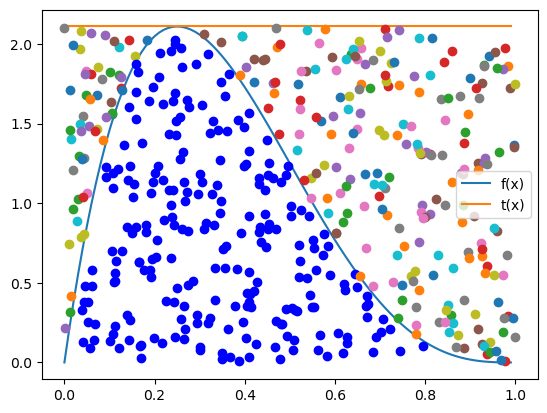

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [13]:
# Función objetivo 
f = lambda x: 20*x * (1-x)**3
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x), 0, disp=False))
# Función t -> Función constante
t = lambda x: max_f * np.ones(len(x))

x = np.arange(0, 1, 0.01)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend(loc='best')
# Simulaciones
N = 500
R1 = np.random.rand(N)
R2 = np.random.rand(N)
# Prueba de función creada
acre2(R2, R1, f, t)